### Decision Trees

This notebook contains some implementation of the sklearn decision trees classes. 

<b>Classification</b> \
DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset. It take 2 input arrays: an array X, sparse or dense, of shape (n_sample, n_features) holding the training samples, and an array Y of integer values of shape (n_samples,) holding class labels for the training samples:

In [3]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[2, 2]])

array([1])

In case that there are multiple classes with the same and highest probability, the classifier will predict the class with the lowest index amongst those classes.

As an alternative to outputting a specific class, the probability of each class can be predicted, which is the fraction of training samples of the class in a leaf:

In [4]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

DecisionTreeClassifier is <b>capable of both binary</b> (where the labels are [-1, 1]) classification and <b>multiclass</b> (where the labels are [0, …, K-1]) classification.

Using the Iris dataset, we can construct a tree as follow: 

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

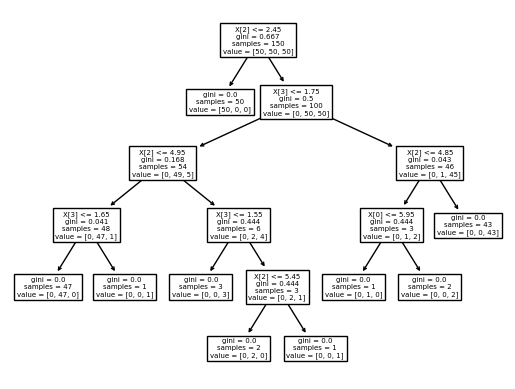

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [7]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

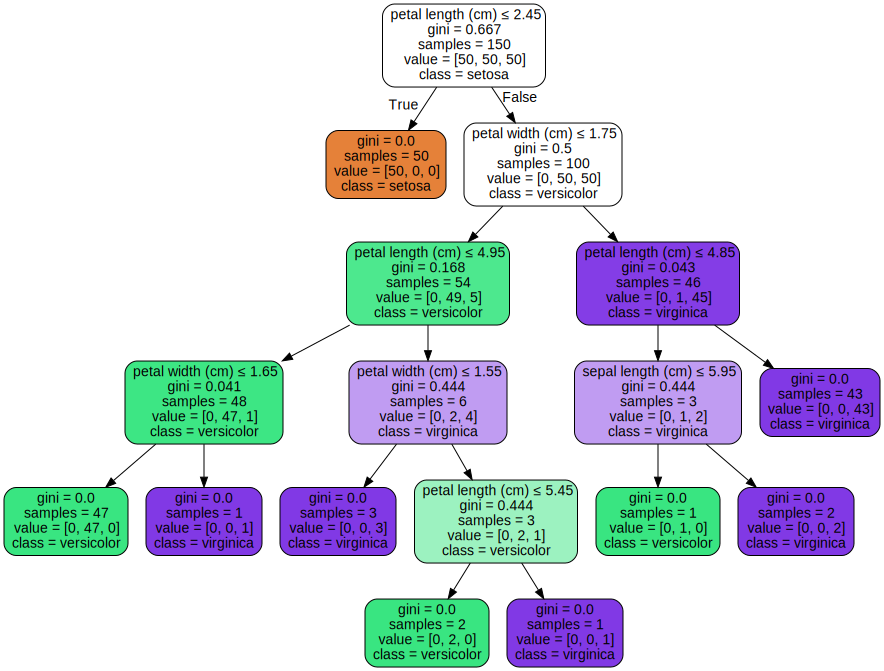

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Alternatively, the tree can also be exported in textual format with the function export_text. This method doesn’t require the installation of external libraries and is more compact:

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text 

iris = load_iris()

decision_tree = DecisionTreeClassifier(random_state = 0, max_depth = 2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names = iris['feature_names'])

print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



<b>Regression</b> \
Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:

In [11]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

<b>Tips on Practical Use of Decision Trees:</b>

1. Decision trees tend to overfit on data with a large number of features. <b>Getting the right ratio of samples to number of features is important</b>, since a tree with few samples in high dimensional space is very likely to overfit.


2. Consider <b>performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand</b> to give your tree a better chance of finding features that are discriminative.


3. <b>Understanding the decision tree structure</b> will help in gaining more insights about how the decision tree makes predictions, which is important for understanding the important features in the data.


4. <b>Visualize your tree as you are training by using the export function</b>. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.


5. Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use <b>max_depth to control the size of the tree to prevent overfitting</b>.


6. Use <b>min_samples_split or min_samples_leaf</b> to <b>ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered</b>. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. Try min_samples_leaf=5 as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. <b>While min_samples_split can create arbitrarily small leaves, min_samples_leaf guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems</b>. For classification with few classes, min_samples_leaf=1 is often the best choice.


7. Note that <b>min_samples_split considers samples directly and independent of sample_weight</b>, if provided (e.g. a node with m weighted samples is still treated as having exactly m samples). Consider min_weight_fraction_leaf or min_impurity_decrease if accounting for sample weights is required at splits.


8. <b>Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant</b>. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.


9. If the <b>samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion</b> such as min_weight_fraction_leaf, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.


10. All <b>decision trees use np.float32 arrays internally</b>. If training data is not in this format, a copy of the dataset will be made.


11. If the <b>input matrix X is very sparse, it is recommended to convert to sparse csc_matrix before calling fit and sparse csr_matrix before calling predict</b>. Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.